In [1]:
import sys, os

%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [4]:
import time, sys

import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

import minimax.envs as envs
import minimax.models as models
from minimax.agents import PPOAgent
from minimax.util.loggers import HumanOutputFormat
from minimax.runners import DRRunner, EvalRunner


# Config
SEED = 1
N_ROLLOUT_STEPS = 250
N_PARALLEL = 32
N_UPDATES = 30_000

LEARNING_RATE = 1e-4
DISCOUNT = 0.995
GAE_LAMBDA = 0.98
ENTROPY_COEF = 1e-3

MAZE_HEIGHT = 13
MAZE_WIDTH = 13
MAZE_N_WALLS = 60
MAZE_NORMALIZE_OBS = True
MAZE_REPLACE_WALL_POS = True

N_EVAL_EPISODES = 10
EVAL_INTERVAL = 100
LOG_INTERVAL = 10
PLOT_INTERVAL = 10

EVAL_RENDER_MODE = "ipython"  # Set to true to make final eval rendered

----------------------------------------
| actor_loss               | -0.000735 |
| entropy                  | 0.0725    |
| env/n_walls              | 50.9      |
| env/passable             | 0.906     |
| env/shortest_path_length | 8.84      |
| grad_norm                | 0.242     |
| mean_gae                 | -0.00169  |
| mean_target              | 0.357     |
| mean_value               | 0.352     |
| n_updates                | 5.05e+03  |
| return                   | 0.609     |
| sps                      | 5.48e+04  |
| steps                    | 0         |
| total_loss               | 0.00505   |
| value_loss               | 0.0117    |
----------------------------------------


KeyboardInterrupt: 

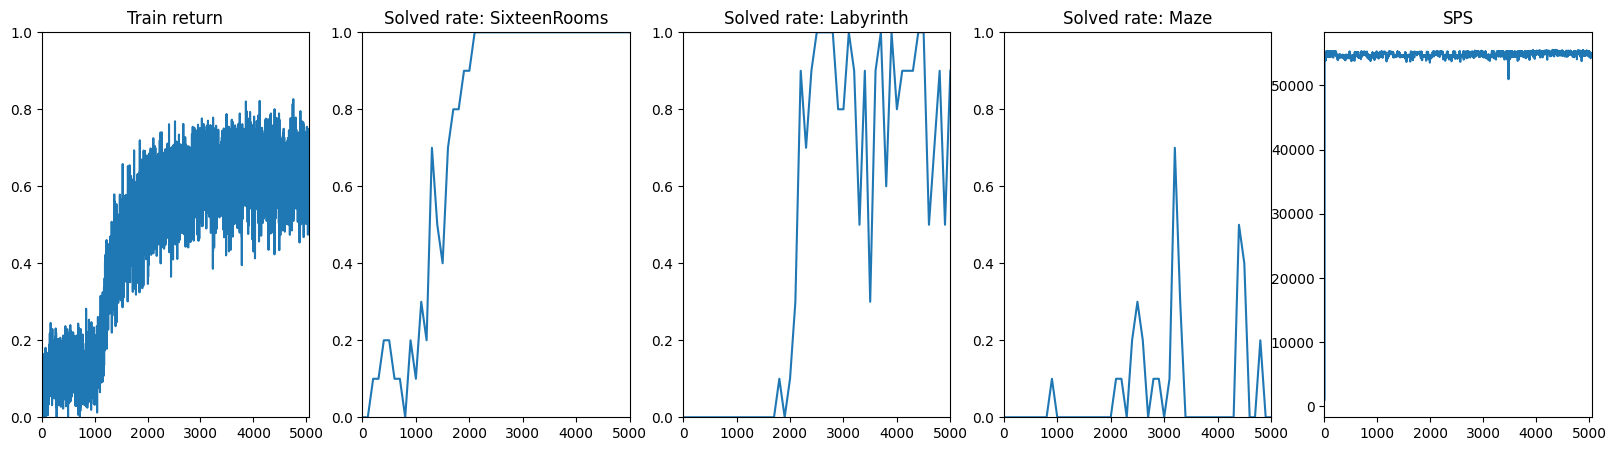

In [6]:
# Final eval
with jax.disable_jit(EVAL_RENDER_MODE is not None):
    eval_runner = EvalRunner(render_mode=EVAL_RENDER_MODE, **eval_runner_kwargs)
    rng = jax.random.PRNGKey(SEED)
    params = runner_state[1].params
    eval_stats = eval_runner.run(rng, params)
    logger.writekvs(eval_stats)

KeyboardInterrupt: 